In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [33]:
df = pd.read_csv("../PRATICA/PROJECTS/ProductSales.csv")
df.shape

(700, 16)

## Exploratory Data Analysis (EDA) to uncover the insights.

In [4]:
df.columns

Index(['Segment', 'Country', 'Product', 'Discountband', 'UnitsSold',
       'ManufacturingPrice ', 'SalesPrice ', 'GrossSales ', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'MonthNumber', 'MonthName', 'Year'],
      dtype='object')

In [7]:
df.describe()

UnitsSold  ManufacturingPrice   SalesPrice    GrossSales   \
count   700.000000           700.000000   700.000000  7.000000e+02   
mean   1608.320000            96.477143   118.428571  1.827594e+05   
std     867.449766           108.602612   136.775515  2.542623e+05   
min     200.000000             3.000000     7.000000  1.799000e+03   
25%     905.000000             5.000000    12.000000  1.739175e+04   
50%    1542.500000            10.000000    20.000000  3.798000e+04   
75%    2229.500000           250.000000   300.000000  2.790250e+05   
max    4493.000000           260.000000   350.000000  1.207500e+06   

           Discounts         Sales           COGS         Profit  MonthNumber  \
count     700.000000  7.000000e+02     700.000000     700.000000   700.000000   
mean    13150.382857  1.696091e+05  145475.217143   24133.891429     7.900000   
std     22962.960784  2.367264e+05  203865.502329   42760.651305     3.377321   
min         0.000000  1.655000e+03     918.000000  -40618.000000     1.000000   
25%       800.250000  1.592800e+04    7490.000000    2805.750000     5.750000   
50%      2585.500000  3.554050e+04   22506.500000    9242.500000     9.000000   
75%     15956.250000  2.610775e+05  245607.500000   22662.000000    10.250000   
max    149678.000000  1.159200e+06  950625.000000  262200.000000    12.000000   

              Year  
count   700.000000  
mean   2013.750000  
std       0.433322  
min    2013.000000  
25%    2013.750000  
50%    2014.000000  
75%    2014.000000  
max    2014.000000

In [8]:
df.dtypes

Segment                 object
Country                 object
Product                 object
Discountband            object
UnitsSold                int64
ManufacturingPrice     float64
SalesPrice             float64
GrossSales             float64
Discounts              float64
Sales                  float64
COGS                   float64
Profit                 float64
Date                    object
MonthNumber              int64
MonthName               object
Year                     int64
dtype: object

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

#### Finding and replacing null values

In [10]:
df.isnull().sum()

Segment                 0
Country                 0
Product                 0
Discountband           53
UnitsSold               0
ManufacturingPrice      0
SalesPrice              0
GrossSales              0
Discounts               0
Sales                   0
COGS                    0
Profit                  0
Date                    0
MonthNumber             0
MonthName               0
Year                    0
dtype: int64

In [11]:
df['Discountband'].fillna('None',inplace=True)

In [12]:
df.loc[:,'Product'].unique()

array(['Carretera', 'Paseo', 'Velo', 'VTT', 'Amarilla', 'Montana'],
      dtype=object)

In [13]:
df.loc[:,'Country'].unique()

array(['Germany', 'Canada', 'France', 'Mexico', 'USA'], dtype=object)

## Finding the total number of units sold,profit and discount per country,segment and Product type in 2013 and 2014

In [14]:
Total_Sales = df.Sales.sum()
Total_Sales

118726385.0

In [15]:
Units_Sold = df.UnitsSold.sum()
Units_Sold

1125824

In [16]:
countries = df.groupby("Country")
tot_countries =countries.UnitsSold.sum()
tot_countries

Country
Canada     247435
France     240937
Germany    201495
Mexico     203325
USA        232632
Name: UnitsSold, dtype: int64

In [17]:
tot_discount = df.Discounts.sum()
tot_discount

9205268.0

In [18]:
qty_countries = countries.Profit.sum()
qty_countries

Country
Canada     3529232.0
France     3781029.0
Germany    3680398.0
Mexico     2907523.0
USA        2995542.0
Name: Profit, dtype: float64

In [19]:
segments=df.groupby("Segment")
tot_segment = segments.Sales.sum()
tot_segment

Segment
Channel Partners     1800594.0
Enterprise          19611705.0
Government          52504283.0
Midmarket            2381883.0
Small Business      42427920.0
Name: Sales, dtype: float64

In [20]:
qty_product = df.UnitsSold.sum()
qty_product

1125824

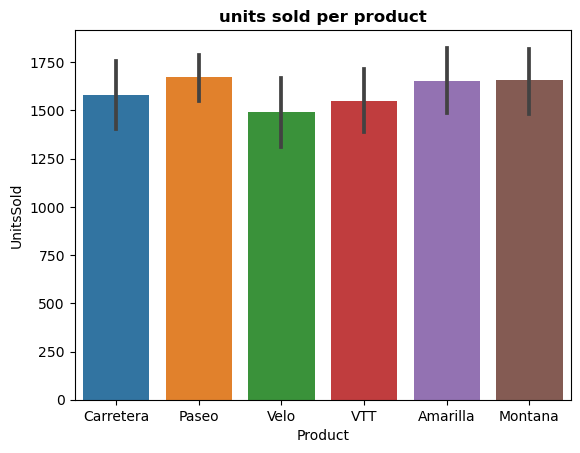

In [21]:
sns.barplot(x='Product',y='UnitsSold',data = df)
plt.title('units sold per product',weight = 'bold')
plt.show()

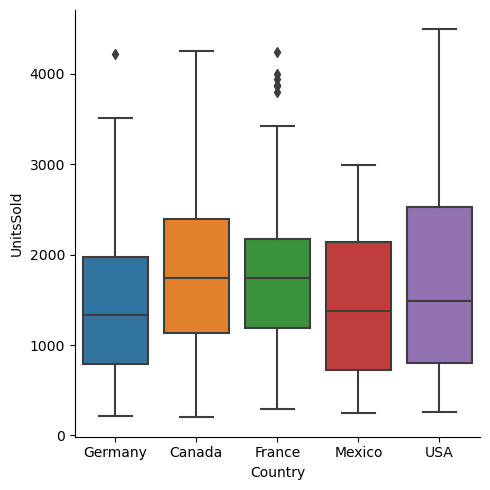

In [22]:
sns.catplot(x='Country', y='UnitsSold', kind = 'box',data =df)
plt.show()

In [25]:
df.columns

Index(['Segment', 'Country', 'Product', 'Discountband', 'UnitsSold',
       'ManufacturingPrice ', 'SalesPrice ', 'GrossSales ', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'MonthNumber', 'MonthName', 'Year'],
      dtype='object')

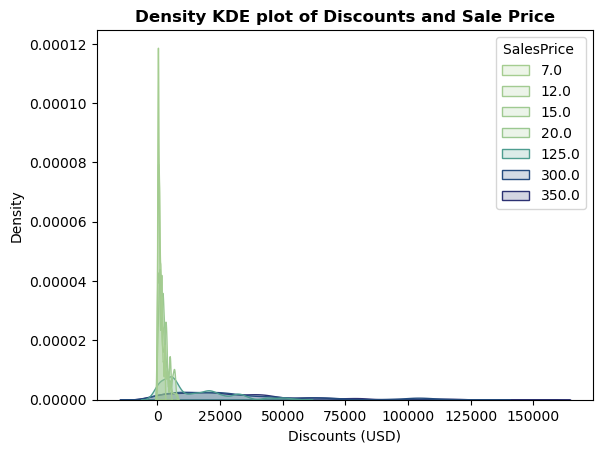

In [27]:
# Set title
plt.title('Density KDE plot of Discounts and Sale Price', weight='bold')
# Change x label
plt.xlabel('Discounts (USD)')

# Create a KDE plot using seaborn
sns.kdeplot(data=df, 
            x='Discounts', 
            hue='SalesPrice ', 
            bw_adjust=0.4,
            fill=True,
            palette='crest',
            alpha=0.2
           )
plt.show()

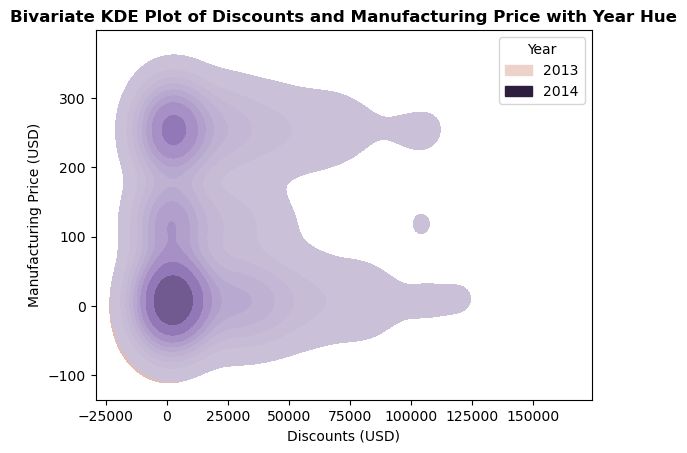

In [38]:
# Set title
plt.title('Bivariate KDE Plot of Discounts and Manufacturing Price with Year Hue', weight='bold')
# Change x label
plt.xlabel('Discounts (USD)')
# Change y label
plt.ylabel('Manufacturing Price (USD)')

# Create a KDE (Kernel Density Estimate) plot using seaborn to visualize the distribution.
sns.kdeplot(data=df, 
            x='Discounts', 
            y='ManufacturingPrice ',
            fill=True,
            hue='Year'
           )

plt.show()

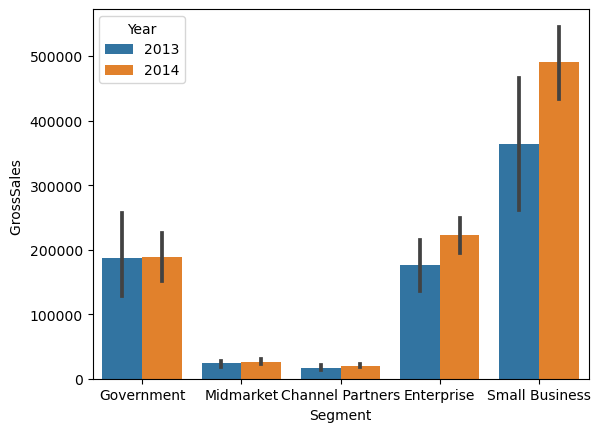

In [30]:
#barplot for gross sales per segment over the years
sns.barplot(data=df, x='Segment',y='GrossSales ', hue ='Year')
plt.show()

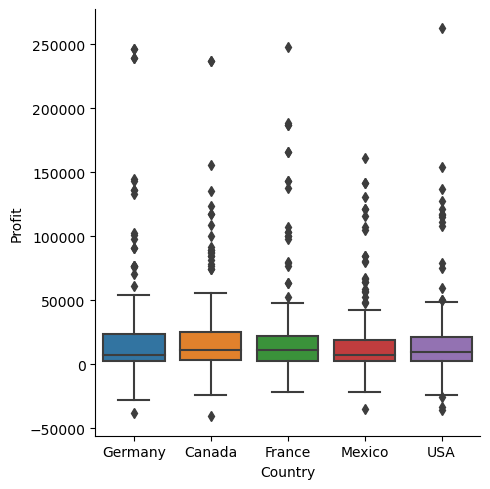

In [31]:
sns.catplot(data=df,x='Country',y='Profit',kind ='box')
plt.show()

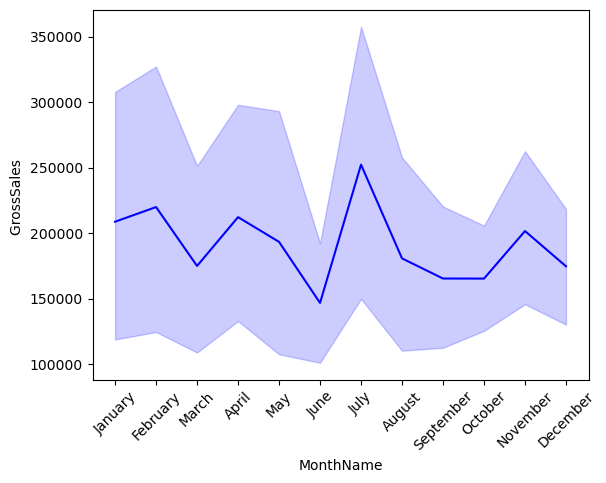

In [34]:
#sales trend over the months
plt.xticks(rotation=45) #for better visibility
sns.lineplot(data=df,x='MonthName',y='GrossSales ',color='blue')
plt.show()

In [39]:
df.columns

Index(['Segment', 'Country', 'Product', 'Discountband', 'UnitsSold',
       'ManufacturingPrice ', 'SalesPrice ', 'GrossSales ', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'MonthNumber', 'MonthName', 'Year'],
      dtype='object')

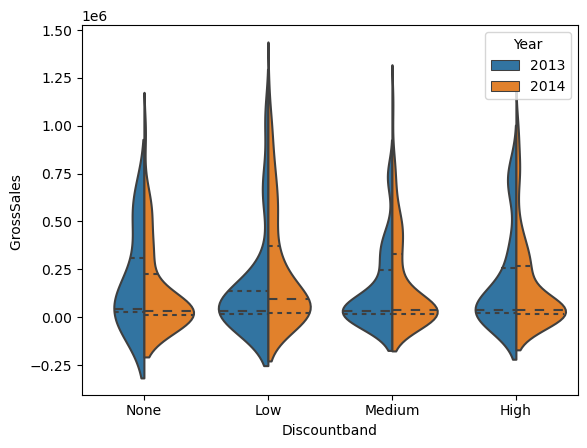

In [43]:
sns.violinplot(data=df,
               x='Discountband',
               y='GrossSales ',
               hue='Year',
               split=True,
               inner='quart')
plt.show()
#the quatile lines show the gross sales for each discount band for years 2013 and 2014.

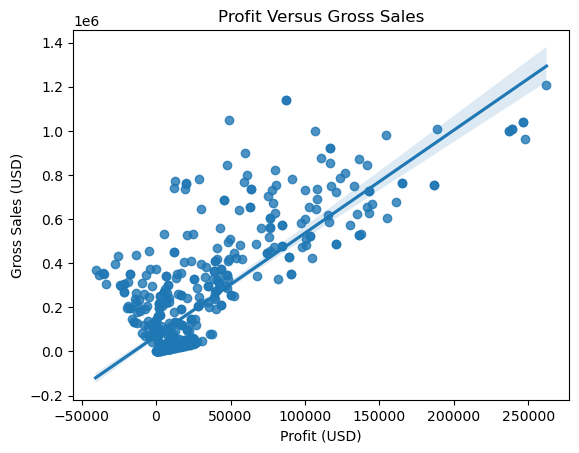

In [37]:
sns.regplot(data=df, x='Profit', y='GrossSales ')
plt.xlabel('Profit (USD)')
plt.ylabel('Gross Sales (USD)')
plt.title('Profit Versus Gross Sales')
plt.show()